# 3. Upravljanje podatkov

(pripravil Tomislav Kartalov, FEEIT, CMUS, Makedonija)

V tem poglavju se boste naučili, kako podatke **ustvariti ročno** ali jih **uvoziti** iz obstoječega vira ter jih **formirati** za posebne potrebe. Potrebna orodja so **Jupyter Notebook**, **Python** in **Google Forms**.

Knjižnice, ki jih boste uporabljali v tem poglavju, so: 
- knjižnica pandas za manipulacijo in analizo podatkov, 
- knjižnica numpy za matematične funkcije na visoki ravni

In [1]:
import pandas as pd
import numpy as np

## 3.1. Ročno ustvarjanje nabora podatkov

Nabor podatkov lahko ustvarite ročno, na primer z **anketo**. Če nabor podatkov vsebuje tehnične ali naravne podatke, se lahko ustvari z meritvami, senzorji, opazovanji ter drugimi napravami in metodami za pridobivanje podatkov.

Ustrezna organizacija ankete, pametna izbira vprašanj, uravnotežena struktura anketirancev (starost, spol, narodnost ...) in anonimnost odgovorov so izrednega pomena za pridobitev uporabnega nabora podatkov z visoko kakovostjo. Vendar razlaga vseh teh meril močno presega obseg tega predmeta. Zaradi preprostosti bomo ta merila na splošno zanemarili, v zameno pa ni mogoče trditi, da imajo tukaj sprejeti sklepi kakršen koli pomen v resničnem svetu. Če na primer v razredu izvedete anketo o najpogosteje uporabljenih platformah družabnih medijev, lahko na podlagi podatkov sklepate, da TikTok močno prekaša Instagram. Vendar bi bil ta rezultat pristranski, saj bi bili anketiranci vaše ankete večinoma najstniki, vi pa niste vključili uravnoteženih starostnih skupin. V resničnem svetu, ko je bilo napisano to besedilo, je Instagram dvakrat večji od TikToka, vendar TikTok prevladuje med mladimi. Če želite oblikovati veljavne zaključke, bi se morali odločiti za nabor podatkov, ki so ga oblikovali strokovni organi in v katerega je bilo vključeno veliko in uravnoteženo število anketirancev. 
Ko smo to razpravo zaključili, si poglejmo, kako ročno ustvariti nabor podatkov.

### 3.1.1. Ročno ustvarjanje nabora podatkov 

Če ste podatke pridobili na nek staromoden način (npr. na papirju), boste morali podatke vnesti v digitalno obliko in nabor podatkov ustvariti ročno. Ta postopek je počasen in naporen ter ga, zlasti če delate sami, lahko uporabite le za zelo majhne nabore podatkov. 

Recimo, da ste svoje prijatelje povprašali o njihovih navadah v družabnih medijih in sestavili naslednji seznam:

<figure>.
<img src="https://github.com/VALENCEML/eBOOK/raw/main/EN/03/HandWrittenList.png" width="500px;"/> 
<figcaption align ="left"> Ročno napisan seznam </figcaption>
</figure>

Ker ste za zbiranje podatkov uporabili list papirja, jih morate zdaj pretvoriti v digitalne podatke.

Najprej opazujmo vnose. Človek te podatke zlahka razreši, vi pa lahko opazite nedoslednosti, ki bi lahko računalnik zmedle. Če na primer poskušate izračunati povprečni čas, ki ga vaši prijatelji dnevno preživijo na platformi družbenih medijev, so ti podatki slabo pripravljeni za takšen izračun, saj so nekateri časi vneseni v urah, drugi pa v minutah. Poleg tega, če želite pripraviti statistiko uporabe platform družbenih medijev, bo računalnik obravnaval **FB** in **Facebook** kot dve različni platformi, čeprav veste, da bi ju bilo treba sešteti. (Enako velja za Insta/Instagram ali YT/YouTube...). To nas spodbuja, da vztrajamo pri doslednih vnosih, morda lahko pripravimo sezname možnih možnosti, še preden začnemo digitalizirati podatke. Recimo, da smo se dogovorili o naslednjih pravilih:
- spol bo predstavljen z veliko črko M ali F
- čas bo predstavljen s celim številom v minutah (brez enote, samo s številko)
- platforma bo predstavljena z nizom črk, ki jih je mogoče najti izključno na tem seznamu: Facebook/Instagram/YouTube/TikTok/WhatsApp/WeChat.

Po vsem tem premisleku lahko končno ustvarite nabor podatkov:

In [2]:
friends = pd.DataFrame(columns=['Name','Gender', 'Time Daily [min]', 'Platform'])

Podatkovni niz se imenuje ***friends*** in je zdaj prazen. Za dodajanje prve vrstice v niz podatkov lahko uporabite ukaz 'append':

In [3]:
friends = friends.append({'Name': 'Zdravko','Gender': 'M', 'Time Daily [min]': '60',  'Platform': 'Facebook'}, ignore_index=True)
friends

,Name,Gender,Time Daily [min],Platform
0,Zdravko,M,60,Facebook


Ukaz 'append' lahko podpira hkratno dodajanje več vrstic v podatkovni niz, vendar jih mora nekdo še vedno vnesti ročno:

In [4]:
friends = friends.append(pd.DataFrame({
                'Name': ['Aleksandra','Ivan'],
                'Gender': ['F','M'], 
                'Time Daily [min]': ['90','120'],  
                'Platform': ['Instagram','TikTok']
                }) , ignore_index=True)
friends

,Name,Gender,Time Daily [min],Platform
0,Zdravko,M,60,Facebook
1,Aleksandra,F,90,Instagram
2,Ivan,M,120,TikTok


Hitrejši in priročnejši način dodajanja samo ene vrstice je naslednja sintaksa:

In [5]:
friends.loc[len(friends.index)] = ['Artim','M', '30', 'Facebook']
friends

,Name,Gender,Time Daily [min],Platform
0,Zdravko,M,60,Facebook
1,Aleksandra,F,90,Instagram
2,Ivan,M,120,TikTok
3,Artim,M,30,Facebook


Lahko celo napišete majhno kodo z zanko, ki vam lahko pomaga pri polavtomatskem vnosu podatkov. Poskusite dokončati zgornji seznam ali pa v nabor podatkov dodajte nekaj svojih prijateljev. Dodajte še vsaj 4 osebe, da dobite podatkovni niz z vsaj 8 zapisi (pomembno za prihodnje prikaze v razdelku 3.3.).

In [6]:
keepgoing = True  #inicializacija
while keepgoing:  # ponavljaj, dokler je keepgoing=True
  Name = input("Ime?")
  Gender = input("Spol? [M/Ž]")
  TimeD = input("Povprečje porabljenega časa? [v minutah]")
  Platform = input("Platforma družabnega omrežja? [Facebook/Instagram/YouTube/TikTok/WhatsApp/WeChat]")
  AnotherRecord = input("Ponovi še enkrat? [Da/Ne]")
  friends.loc[len(friends.index)] = [Name, Gender, TimeD, Platform]
  if AnotherRecord == 'n':
    keepgoing = False # when the user enters 'n', that breaks the loop
friends

Ime?Ziga
Spol? [M/Ž]M
Povprečje porabljenega časa? [v minutah]60
Platforma družabnega omrežja? [Facebook/Instagram/YouTube/TikTok/WhatsApp/WeChat]Facebook
Ponovi še enkrat? [Da/Ne]ne
Ime?David
Spol? [M/Ž]M
Povprečje porabljenega časa? [v minutah]10
Platforma družabnega omrežja? [Facebook/Instagram/YouTube/TikTok/WhatsApp/WeChat]TikTok
Ponovi še enkrat? [Da/Ne]n


,Name,Gender,Time Daily [min],Platform
0,Zdravko,M,60,Facebook
1,Aleksandra,F,90,Instagram
2,Ivan,M,120,TikTok
3,Artim,M,30,Facebook
4,Ziga,M,60,Facebook
5,David,M,10,TikTok


Zdaj imate nabor podatkov. O analizi in vizualizaciji podatkov boste izvedeli v prihodnjih poglavjih, za zdaj pa le majhen napovednik:

Text(0.5, 1.0, 'Družabna omrežja mojih prijateljev')

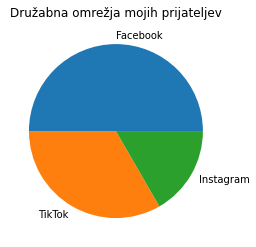

In [7]:
from matplotlib import pyplot as plt
counts = friends.Platform.value_counts()
plt.pie(counts, labels=friends.Platform.value_counts().index.tolist())
plt.title("Družabna omrežja mojih prijateljev") 

Podatkovni niz je v delovnem pomnilniku računalnika v podatkovnem okviru (nekakšna večdimenzionalna spremenljivka). Ko zapustite to sejo, se vsi podatki izgubijo. Če želite podatke shraniti in prenesti za prihodnjo uporabo, lahko to storite z naslednjimi ukazi:

In [10]:
from google.colab import files
friends.to_csv('friends.csv', encoding = 'utf-8-sig', index=False)
files.download('friends.csv')

Nato se niz podatkov shrani lokalno na disk računalnika, v naslednji seji pa ga lahko uvozite in nadaljujete delo z njim.

*Daljša vaja*: poskusite ustvariti svoj podatkovni niz z drugimi parametri (nekaj idej: mesec rojstva, barva oči ali las, priljubljena glasbena zvrst ...). Izvedite anketo med prijatelji, iz nje ustvarite podatkovni niz in ga shranite za prihodnjo uporabo! Poiščite datoteko v računalniku, jo odprite (datoteke csv lahko odpre katerikoli urejevalnik besedila, lahko pa uporabite urejevalnik preglednic, kot sta Excel ali Calc) in si oglejte strukturo podatkov v njej. Če želite, lahko v prihodnjih predstavitvah delate z lastnimi podatki, vendar zaradi združljivosti poskrbite, da bodo imeli vsaj 8 zapisov.



### 3.1.2. Ustvarjanje nabora podatkov na praktičen način

Kot je bilo prikazano v prejšnjem razdelku, je ustvarjanje nabora podatkov z ročnim vnosom zelo počasen in naporen postopek. Kljub temu ste z njegovim učenjem sprejeli koristne veščine za upravljanje podatkov, znanje o strukturiranju podatkov in potrebo po doslednosti podatkov. 
Zdaj si predstavljajte, da želite svojo raziskavo razširiti na razred ali celo na celotno šolo. Ročno vnašanje podatkov postane skoraj nemogoče za tako velike skupine anketirancev. Rešitev za to težavo je uporaba nekega spletnega obrazca ali vprašalnika, ki ga je mogoče razširiti velikemu številu anketirancev prek interneta, pri čemer se uporabi le naslov URL - ta se zlahka razširja prek družabnih medijev ali klepetalnic, kot sta Viber ali Telegram, ali bolj tradicionalno prek e-pošte.

Profesionalni zbiralci podatkov izdelajo svoje specializirane spletne obrazce za ankete, ki jih izvajajo. Vendar je javnosti na voljo nekaj brezplačnih orodij, ki so prav tako zelo priročna. Eno najboljših in najpogosteje uporabljenih orodij za zbiranje podatkov je [**Google Forms**](https://docs.google.com/forms). 

Poskusimo ustvariti isto anketo iz prejšnjega poglavja z uporabo orodja Google Forms. Če kliknete zgornjo povezavo, se bo v brskalniku odprl nov zavihek, domača stran Google Forms, kjer lahko izberete eno od predlog obrazcev ali preprosto odprete prazen obrazec. Če ste to orodje že uporabili, se bodo na tej strani prikazali tudi prej ustvarjeni obrazci.

Zdaj odprite nov prazen obrazec in prikazal se bo naslednji vmesnik:


<figure>.
<img src="https://github.com/VALENCEML/eBOOK/raw/main/EN/03/UntitledGoogleForm.png" width="500px;"/> 
<figcaption align = "left"> Prazen obrazec Google </figcaption>
</figure>

V tem intuitivnem vmesniku lahko vnesete naslov in opis obrazca ter vprašanja. Zaradi anonimnosti zamenjajmo vprašanje *Namesto* iz prejšnje ankete z letom študija. Za vprašanja, ki imajo omejeno število možnih odgovorov, kot je leto študija, obrazci Google Forms ponujajo različne vrste vprašanj s predvidenimi seznami odgovorov, kot so izbirni odgovori, potrditvena polja ali spustni odgovori. S tem je zelo enostavno zagotoviti skladnost podatkov (za razliko od ročnega vnosa podatkov).

<figure>
<img src="https://github.com/VALENCEML/eBOOK/raw/main/EN/03/TitledGoogleForm.png" width="500px;"/> 
<figcaption align ="left"> Odgovori so omejeni na določen seznam možnosti </figcaption>
</figure>

Znak plus v desnem meniju, na sliki označen z rdečo puščico, doda novo vprašanje. Preostala vprašanja so lahko podobna, vendar lahko eksperimentirate s svojimi zamislimi.

<figure>
<img src="https://github.com/VALENCEML/eBOOK/raw/main/EN/03/Questions2to4.png" width="500px;"/> 
<figcaption align = "left"> Preostala vprašanja </figcaption>
</figure>

Ko je obrazec pripravljen, se z gumbom **Send** v zgornjem desnem kotu odpre vmesnik za pošiljanje, v katerem lahko prilagodite način distribucije obrazca. Obrazec se lahko razpošlje po elektronski pošti ali prek povezave, ki jo je mogoče kopirati in razširjati na kateri koli platformi, lahko pa se obrazec vgradi v spletno mesto.

*Vaja:* Delo v skupinah. Razdelite razred v 4 ekipe (pri večjih razredih je število ekip lahko večje). Vsaka ekipa naj si zamisli idejo za anketo in izdela obrazec za zbiranje podatkov. Nato obrazce razdelijo po razredu in VSAK učenec odgovori na vse 4 obrazce. 

Po končanem obdobju anketiranja lahko rezultate prenesete iz razdelka *Odgovori* na vrhu okna za urejanje obrazca in jih po možnosti prenesete v obliki datoteke *csv* (ločene z vejico). 

*Daljše branje:* več informacij in pomoč o obrazcih Google lahko najdete [tukaj] (https://support.google.com/docs).

## 3.2. Uvoz niza podatkov

Tukaj se boste naučili, kako uvoziti že obstoječi nabor podatkov. Ustvarite ga lahko vi ali druge osebe ali institucije in je trajno shranjen kot datoteka na vašem računalniku ali nekje na internetu. Najpogostejši format datoteke za shranjevanje podatkov je format *csv*, ki pomeni **C**omma **S**eparated **V**alues. Format *csv* ima več prednosti pred drugimi oblikami shranjevanja podatkov, nekatere med njimi so preprostost, dostopnost prek standardnih urejevalnikov in razumljivost (ko ga odprete, takoj veste, kaj je kaj). Če ste izvedli vajo, predlagano na koncu oddelka 3.1.1, in odprli takšno datoteko s kakšnim programom (urejevalnikom besedila ali preglednic), ste že seznanjeni z notranjo strukturo tega formata datoteke. Običajno je prva vrstica naslov tabele (imena ali opisi podatkov po stolpcih), vse naslednje vrstice pa so sami podatki, pri čemer je vsak podatek od okolice ločen z vejico.

Poskusimo uvoziti svoj lasten nabor podatkov, ki ste ga ročno ustvarili in shranili. Vstavite ga v drug podatkovni okvir, *friends_imported*. Vizualno preverite, ali gre za iste podatke. Ali je kakšna razlika?

In [11]:
friends_imported = pd.read_csv('friends.csv')
friends_imported

,Name,Gender,Time Daily [min],Platform
0,Zdravko,M,60,Facebook
1,Aleksandra,F,90,Instagram
2,Ivan,M,120,TikTok
3,Artim,M,30,Facebook
4,Ziga,M,60,Facebook
5,David,M,10,TikTok


In [12]:
friends

,Name,Gender,Time Daily [min],Platform
0,Zdravko,M,60,Facebook
1,Aleksandra,F,90,Instagram
2,Ivan,M,120,TikTok
3,Artim,M,30,Facebook
4,Ziga,M,60,Facebook
5,David,M,10,TikTok


Razlika med izvirnim in uvoženim podatkovnim okvirom dejansko JE, vendar je človeškemu očesu nevidna. Če jo želite videti, zaženite naslednji ukaz:

In [13]:
t = friends.dtypes   # ta ukaz izpiše vse tipe atributov
t

Name                object
Gender              object
Time Daily [min]    object
Platform            object
dtype: object

Poskusimo enako za uvoženi podatkovni okvir:

In [14]:
t2 = friends_imported.dtypes
t2

Name                object
Gender              object
Time Daily [min]     int64
Platform            object
dtype: object

Ali vidite razliko? Razlog za to je pretvorba vrste parametra *Dnevni čas [min]*. V naš podatkovni okvir smo vnesli čase kot *tekst* (vnesli smo '60' in ne 60). Pri shranjevanju v datoteko *csv* in nato pri branju nazaj so se časi spremenili v številke, ker je *pandas* domneval, da če je nekaj zapisano kot številka, se mora ohraniti kot številka. Bodite pozorni na to vedenje! Praviloma je vedno pametno preveriti vrste** svojih podatkov, zlasti če jih uvažate!!! K tej razpravi se bomo vrnili v razdelku 3.3.2.1.

*Daljša praksa:* Čeprav se format *csv* najpogosteje uporablja za shranjevanje podatkov, ima svoje omejitve, kadar je treba shraniti kompleksnejše podatkovne strukture. *Knjižnica *pandas* ponuja podporo za več formatov za shranjevanje podatkov, poleg *csv* lahko bere tudi *excel*, *sql*, *json*, *html* in druge vrste datotek. Poskusite shraniti in nato prebrati svoj niz podatkov v nekaterih drugih formatih.  Vmes preverite datoteko, shranjeno v računalniku, in opazujte njeno notranjo strukturo. 
Tukaj je nekaj predlogov: 
- *dataframe*.to_excel / pd.read_excel
- *dataframe*.to_json / pd.read_json
- *dataframe*.to_html / pd.read_html
- *dataframe*.to_xml / pd.read_xml

Uporaba je podobna tisti, ki ste se jo naučili zgoraj, če pa jo potrebujete, lahko najdete podrobna navodila [tukaj](https://pandas.pydata.org/docs/reference/io.html).

### 3.2.1. Spletne podatkovne storitve


V nekaterih primerih ne bo mogoče ustvariti lastnih podatkovnih nizov. Obsežne in strokovno ustvarjene podatkovne nize lahko pridobite iz nekaterih spletnih podatkovnih storitev. V nadaljevanju navajamo nekaj takih, ki bi jih bilo koristno poznati:
- [kaggle](https://www.kaggle.com/datasets), (različni podatki po virih skupnosti)
- [Google Dataset](https://datasetsearch.research.google.com/), (različni podatki, Google)
- [Global Health](https://apps.who.int/gho/data/node.home), (zdravstveni podatki, WHO)
- [Datahub.io](https://datahub.io/collections), (večinoma poslovni in finančni podatki)
-[CrimeExplorer](https://crime-data-explorer.fr.cloud.gov/), (podatki o kaznivih dejanjih, FBI)
- [EarthData](https://earthdata.nasa.gov/), (okoljski podatki, NASA)
- [CERN open data](http://opendata.cern.ch/), (podatki o fiziki delcev, CERN)


Nekatere od teh storitev zahtevajo brezplačno registracijo (uporabniški račun), druge so dostopne brez registracije.

## 3.3. Upravljanje nabora podatkov

Zdaj veste, kako ustvariti, shraniti in uvoziti podatke. Preden se lotite analitike in obdelave, morate vedeti še nekaj osnovnih stvari o upravljanju svojega nabora podatkov.

### 3.3.1. Dostop do izbranih delov podatkov

Za referenco je tukaj še enkrat celoten nabor podatkov:

In [15]:
friends

,Name,Gender,Time Daily [min],Platform
0,Zdravko,M,60,Facebook
1,Aleksandra,F,90,Instagram
2,Ivan,M,120,TikTok
3,Artim,M,30,Facebook
4,Ziga,M,60,Facebook
5,David,M,10,TikTok


Prvi stolpec brez imena zgoraj je stolpec z indeksom. Za dostop do določenega zapisa iz niza podatkov lahko uporabite operator *loc*. Ta operator deluje z indeksom zahtevanega zapisa.

In [16]:
friends.loc[3]

Name                   Artim
Gender                     M
Time Daily [min]          30
Platform            Facebook
Name: 3, dtype: object

Če ne potrebujete vseh podatkov za ta zapis, temveč le eno informacijo, lahko to določite:

In [17]:
friends.loc[3,'Platform']

'Facebook'

Prav tako lahko hkrati dostopate do več indeksov, ki so urejeni ali poljubni:

In [18]:
friends.loc[2:4]

,Name,Gender,Time Daily [min],Platform
2,Ivan,M,120,TikTok
3,Artim,M,30,Facebook
4,Ziga,M,60,Facebook


In [20]:
friends.loc[{0,2,3,4}]

,Name,Gender,Time Daily [min],Platform
0,Zdravko,M,60,Facebook
2,Ivan,M,120,TikTok
3,Artim,M,30,Facebook
4,Ziga,M,60,Facebook


Zgornja primera prikazujeta, kako dostopati do podatkov po vrsticah. Če je treba dostopati do stolpcev, na primer, če želite videti vsa imena v naboru podatkov, potem:

In [21]:
friends['Name']

0       Zdravko
1    Aleksandra
2          Ivan
3         Artim
4          Ziga
5         David
Name: Name, dtype: object

Za pridobivanje več stolpcev iz niza podatkov je treba uporabiti seznam - oglati oklepaji {}.

In [22]:
friends[{'Gender','Platform'}]

,Gender,Platform
0,M,Facebook
1,F,Instagram
2,M,TikTok
3,M,Facebook
4,M,Facebook
5,M,TikTok


Včasih ne poznate indeksa zapisa, ki ga želite videti, poznate pa nekatere druge informacije. V tem primeru lahko namesto številke kot indeksa uporabite logično merilo.

In [23]:
friends['Name']=='Ivan'

0    False
1    False
2     True
3    False
4    False
5    False
Name: Name, dtype: bool

Če ta rezultat uporabite kot indeks, boste z operatorjem *loc* dobili **saj** zapise, pri katerih je pogoj resničen.

In [24]:
friends.loc[friends['Name']=='Ivan']

,Name,Gender,Time Daily [min],Platform
2,Ivan,M,120,TikTok


Ta trik lahko uporabite tudi za filtriranje nabora podatkov. Poglejmo na primer, kdo uporablja TikTok:

In [25]:
friends.loc[friends['Platform']=='TikTok']

,Name,Gender,Time Daily [min],Platform
2,Ivan,M,120,TikTok
5,David,M,10,TikTok


Opazujte, kako v vseh teh primerih dobite podmnožice prvotnega nabora podatkov. Vsaka od njih podeduje prvotne indekse, zato jo lahko po potrebi uporabite kot ločeno zbirko podatkov. V ta namen lahko izbrano podmnožico pripišete novemu podatkovnemu okviru.

*Vaja:* poskusite svoje zamisli za prikaz samo podmnožic podatkov in za filtriranje podatkov z različnimi merili.

### 3.3.2. Modificiranje podatkov

Ko obvladate tehnike dostopa do podatkov, je spreminjanje podatkov zelo preprosto. Spreminjanje je samo dodeljevanje nove vrednosti izbranemu podatku. Poskusimo zamenjati en zapis (npr. indeks = 4) z drugim. 

Dostop do zapisa (izbira):

In [26]:
friends.loc[4]

Name                    Ziga
Gender                     M
Time Daily [min]          60
Platform            Facebook
Name: 4, dtype: object

Izbranemu zapisu dodelite novo(-e) vrednost(-i):

In [27]:
friends.loc[4] = ['Maryna','F','80','Instagram']
friends

,Name,Gender,Time Daily [min],Platform
0,Zdravko,M,60,Facebook
1,Aleksandra,F,90,Instagram
2,Ivan,M,120,TikTok
3,Artim,M,30,Facebook
4,Maryna,F,80,Instagram
5,David,M,10,TikTok


Če je treba spremeniti samo eno vrednost, veljajo vsa zgoraj navedena izbirna merila. Spreminjanje vrednosti v fiksni vrstici (znan indeks):

In [28]:
friends.loc[4, 'Time Daily [min]'] = '120'
friends

,Name,Gender,Time Daily [min],Platform
0,Zdravko,M,60,Facebook
1,Aleksandra,F,90,Instagram
2,Ivan,M,120,TikTok
3,Artim,M,30,Facebook
4,Maryna,F,120,Instagram
5,David,M,10,TikTok


Spreminjanje vrednosti v vrstici na podlagi pravila (neznan indeks):

In [30]:
friends.loc[friends['Name']=='Maryna', 'Name'] = 'Marina'  # to je funkcija "najdi in zamenjaj"
friends

,Name,Gender,Time Daily [min],Platform
0,Zdravko,M,60,Facebook
1,Aleksandra,F,90,Instagram
2,Ivan,M,120,TikTok
3,Artim,M,30,Facebook
4,Marina,F,120,Instagram
5,David,M,10,TikTok


To storite preudarno, saj gumba "razveljaviti "** ni! Če je pravilo izpolnjeno za več vrstic, bodo **spremenjene vse vrstice**!

In [32]:
friends2 = friends.copy()  # kopiramo podatke v nov podatkovni okvir
friends2.loc[friends2['Gender']=='M', 'Name'] = 'Oliver'  # to je ukaz, ki uniči vse podatke
friends2

,Name,Gender,Time Daily [min],Platform
0,Oliver,M,60,Facebook
1,Aleksandra,F,90,Instagram
2,Oliver,M,120,TikTok
3,Oliver,M,30,Facebook
4,Marina,F,120,Instagram
5,Oliver,M,10,TikTok


*Vaja:* Ali ste pri ročnem vnosu prijateljev naredili nekaj napak? Morda je kakšna črka zdrsnila med številke? Ali pa ste za spol napisali "M<"? Poskusite očistiti podatke in popraviti morebitne napake tako, da spremenite podatkovni okvir!

#### 3.3.2.1. Prilagajanje vrste podatkov

Ustvarjeni podatkovni okvir vsebuje nekaj številk. Poskusimo z njimi opraviti kakšen izračun, npr. dobiti povprečni dnevni čas na družabnih omrežjih za vse udeležence v anketi.

In [36]:
friends['Time Daily [min]'].mean()

10150200502001.666

Ali menite, da je ta številka točna? Preverite jo lahko z ročnim izračunom, pri čemer uporabite celoten podatkovni okvir.

In [35]:
friends

,Name,Gender,Time Daily [min],Platform
0,Zdravko,M,60,Facebook
1,Aleksandra,F,90,Instagram
2,Ivan,M,120,TikTok
3,Artim,M,30,Facebook
4,Marina,F,120,Instagram
5,David,M,10,TikTok


Pri tem izračunu je očitno nekaj težav. Poskusimo isti izračun z uvoženim podatkovnim okvirom:

In [37]:
friends_imported['Time Daily [min]'].mean()

61.666666666666664

Ta številka je videti natančna. Težava z izračunanim povprečnim časom iz prvotnega podatkovnega okvira je v podatkovni vrsti stolpca "Dnevni čas [min]".

In [38]:
t = friends.dtypes
t

Name                object
Gender              object
Time Daily [min]    object
Platform            object
dtype: object

Ker smo čase v minutah vnesli kot besedilo, so shranjeni kot niz znakov. '60' minut ni število 60, temveč znaka '6' in '0', kar zmoti izračun in vrne tako nelogično število. Rešitev te težave je pretvorba (casting) vseh dnevnih časov v naboru podatkov v številke. To lahko storite tako, da:

In [39]:
friends['Time Daily [min]'] = friends['Time Daily [min]'].apply(pd.to_numeric)
t = friends.dtypes
t

Name                object
Gender              object
Time Daily [min]     int64
Platform            object
dtype: object

Poskusimo ponovno:

In [40]:
friends['Time Daily [min]'].mean()

71.66666666666667

Ali je ta številka podobna vašemu ročnemu izračunu?

Če je potrebna pretvorba v nasprotni smeri (števila v nize), je ukaz:

In [41]:
friends['Time Daily [min]'] = friends['Time Daily [min]'].apply(str)
t = friends.dtypes
t

Name                object
Gender              object
Time Daily [min]    object
Platform            object
dtype: object

Enak rezultat lahko dosežemo, če je besedilna vrednost dodeljena nekemu številskemu polju v podatkovnem okviru, potem bo *pandas* samodejno pretvoril polje v niz. Vendar ta pristop ni priporočljiv, saj lahko že majhna malomarnost privede do kaotičnih podatkovnih tipov v celotnem podatkovnem nizu.

### 3.3.3. Brisanje (nekaterih) podatkov

Včasih delov podatkovnega okvira ne potrebujemo več ali jih je treba izključiti iz nadaljnje analize. Eden od načinov je, da izberete ustrezen del podatkovnega okvira in ga dodelite drugemu (novemu) podatkovnemu okviru, v nekaterih primerih pa je preprostejša rešitev brisanje nepotrebnih podatkov.

In [42]:
friends2 = friends.copy()   # don't destroy the original data set, make a new one
friends2

,Name,Gender,Time Daily [min],Platform
0,Zdravko,M,60,Facebook
1,Aleksandra,F,90,Instagram
2,Ivan,M,120,TikTok
3,Artim,M,30,Facebook
4,Marina,F,120,Instagram
5,David,M,10,TikTok


Za delno brisanje podatkov se uporablja operator *drop*. 
Brisanje fiksnega zapisa (znan indeks):

In [43]:
friends2.drop([5])

,Name,Gender,Time Daily [min],Platform
0,Zdravko,M,60,Facebook
1,Aleksandra,F,90,Instagram
2,Ivan,M,120,TikTok
3,Artim,M,30,Facebook
4,Marina,F,120,Instagram


Opazujte, kako se prvotni indeksi ohranijo. Po odstranitvi zapisa se niz podatkov ne indeksira ponovno. Brisanje več zapisov:

In [45]:
friends2.drop([0, 3, 4])

,Name,Gender,Time Daily [min],Platform
1,Aleksandra,F,90,Instagram
2,Ivan,M,120,TikTok
5,David,M,10,TikTok


Opazite, da je vrstica z indeksom=5 zdaj spet v podatkih. To je zato, ker je bil zgornji rezultat izveden na varni kopiji podatkovnega okvira in ne na samem podatkovnem okviru. Ker ste izvirne podatke že kopirali, lahko trajno brisanje izvedete v samem podatkovnem okviru z uporabo operatorja *inplace*.

In [46]:
friends2.drop([0, 3, 5],inplace=True)
friends2 # note that now the result must be explicitly printed, to see it

,Name,Gender,Time Daily [min],Platform
1,Aleksandra,F,90,Instagram
2,Ivan,M,120,TikTok
4,Marina,F,120,Instagram


Brisanje po pravilu (neznani indeks):

In [47]:
friends2.drop(friends2[friends2['Gender']=='F'].index, inplace=True)   # odstrani vse ženske
friends2

,Name,Gender,Time Daily [min],Platform
2,Ivan,M,120,TikTok


In [48]:
friends2 = friends.copy() # prinesi nazaj podatke
friends

,Name,Gender,Time Daily [min],Platform
0,Zdravko,M,60,Facebook
1,Aleksandra,F,90,Instagram
2,Ivan,M,120,TikTok
3,Artim,M,30,Facebook
4,Marina,F,120,Instagram
5,David,M,10,TikTok


Za brisanje stolpcev je treba navesti parameter *axis=1*. Lahko je določen tudi za brisanje vrstic (*axis=0*), če pa ni določen, se predpostavlja, da se brišejo vrstice.

In [49]:
friends2.drop(['Name'], axis=1, inplace=True)  # pripravi podatke anonimno
friends2

,Gender,Time Daily [min],Platform
0,M,60,Facebook
1,F,90,Instagram
2,M,120,TikTok
3,M,30,Facebook
4,F,120,Instagram
5,M,10,TikTok


*Vaja:* Poskusite odstraniti vse zapise ljudi, ki so v družabnih medijih preživeli podpovprečno veliko časa.

### 3.3.4. Združevanje podatkov

V nekaterih primerih je treba podatke iz več virov združiti v en podatkovni niz. Za simulacijo takega scenarija zaženite naslednje:

In [54]:
friends1 = friends.copy()  
friends2 = friends.copy()  
friends1.drop([0, 2, 5],inplace=True)
friends2.drop([1, 3, 4],inplace=True)
friends1

,Name,Gender,Time Daily [min],Platform
1,Aleksandra,F,90,Instagram
3,Artim,M,30,Facebook
4,Marina,F,120,Instagram


In [50]:
friends2

,Gender,Time Daily [min],Platform
0,M,60,Facebook
1,F,90,Instagram
2,M,120,TikTok
3,M,30,Facebook
4,F,120,Instagram
5,M,10,TikTok


Zdaj imamo dva različna podatkovna niza. Operator *concat* ta dva niza združi v enega.

In [55]:
friends_all = pd.concat([friends1, friends2])
friends_all

,Name,Gender,Time Daily [min],Platform
1,Aleksandra,F,90,Instagram
3,Artim,M,30,Facebook
4,Marina,F,120,Instagram
0,Zdravko,M,60,Facebook
2,Ivan,M,120,TikTok
5,David,M,10,TikTok


Opazujte, kako je vrstni red indeksov uničen in nova podatkovna množica ima neenakovredne indekse. To ni težava pri operacijah s podatki, vendar morate biti zelo previdni, saj ima zdaj lahko več zapisov isti indeks.
Če želite, da novi niz podatkov obnovi svoje nove indekse, uporabite stikalo *ignore_index*:

In [56]:
friends_all = pd.concat([friends1, friends2], ignore_index = True)
friends_all

,Name,Gender,Time Daily [min],Platform
0,Aleksandra,F,90,Instagram
1,Artim,M,30,Facebook
2,Marina,F,120,Instagram
3,Zdravko,M,60,Facebook
4,Ivan,M,120,TikTok
5,David,M,10,TikTok


Če želite ohraniti stare indekse, vendar še vedno želite edinstveno dostopne zapise, lahko dodate še en indeks, ki je hierarhično pomembnejši od starega.

In [57]:
friends_all = pd.concat([friends1, friends2], keys=['fr1','fr2'])
friends_all

Name Gender Time Daily [min]   Platform
fr1 1  Aleksandra      F               90  Instagram
    3       Artim      M               30   Facebook
    4      Marina      F              120  Instagram
fr2 0     Zdravko      M               60   Facebook
    2        Ivan      M              120     TikTok
    5       David      M               10     TikTok

Zdaj je vsak zapis edinstveno dostopen in mu je mogoče dodeliti edinstveno vrednost:

In [58]:
friends_all.loc['fr1'].loc[4,'Platform'] = 'TikTok'
friends_all.loc['fr2'].loc[4,'Platform'] = 'Instagram'
friends_all

Name Gender Time Daily [min]   Platform
fr1 1  Aleksandra      F               90  Instagram
    3       Artim      M               30   Facebook
    4      Marina      F              120     TikTok
fr2 0     Zdravko      M               60   Facebook
    2        Ivan      M              120     TikTok
    5       David      M               10     TikTok

Kaj pa, če imajo podatkovni nizi različne strukture? Recimo, da imate dva podatkovna niza, enega o prisotnosti v družabnih medijih, drugega pa o rezultatih testov. Dva podatkovna niza imata nekatere zapise, ki se prekrivajo, drugi pa so različni. Za ponazoritev takega scenarija najprej izvedite naslednje spremembe v *friends2*:

In [59]:
friends2['Time Daily [min]'] = friends2['Time Daily [min]'].apply(pd.to_numeric)
friends2 = friends2.rename(columns={'Time Daily [min]':'Test Score'}) # preimenuj stolpec
friends2['Test Score'] = friends2['Test Score'] + 48 # spremeni vrednosti v stolpcih tako, da bodo drugačni od prejšnjih 
friends2

,Name,Gender,Test Score,Platform
0,Zdravko,M,108,Facebook
2,Ivan,M,168,TikTok
5,David,M,58,TikTok


Rezultat kombinacije obeh podatkovnih zbirk je:

In [60]:
friends_all = pd.concat([friends1, friends2])
friends_all

,Name,Gender,Time Daily [min],Platform,Test Score
1,Aleksandra,F,90,Instagram,NaN
3,Artim,M,30,Facebook,NaN
4,Marina,F,120,Instagram,NaN
0,Zdravko,M,NaN,Facebook,108.0
2,Ivan,M,NaN,TikTok,168.0
5,David,M,NaN,TikTok,58.0


Upoštevajte prazne vrednosti *NaN*. Parametri, ki niso na voljo v združenem podatkovnem nizu, so označeni z *NaN*.
Ta rezultat je nekoliko uporaben, vendar je za resnično združitev podatkov potrebnih še nekaj korakov. Najprej poiščimo zapise, ki obstajajo v obeh začetnih podatkovnih zbirkah.

In [61]:
friends_common = friends1.merge(friends2,on=['Name','Gender','Platform'])  # predpostavite, da bodo Name,Gender in Platform v obeh podatkovnih zbirkah
friends_common

,Name,Gender,Time Daily [min],Platform,Test Score


Nato izbrišimo te zapise iz združenega podatkovnega niza. V *friends_all* preverimo vsa imena iz *friends_common* in izbrišemo vse zapise s tem imenom.

In [ ]:
for i in range (len(friends_common.index)):   
    friends_all.drop(friends_all[friends_all['Name']==friends_common.loc[i,'Name']].index, inplace=True)  # try to analyze and understand this code, multiple concepts of selecting, deleting and assigning are used in the same row!
friends_all

Na koncu je treba splošna imena dodati ostalim podatkom:

In [ ]:
friends_all = pd.concat([friends_all, friends_common],ignore_index=True)
friends_all

Podatki so v celoti združeni in za osebe, ki obstajajo v obeh zbirkah podatkov, so zapisi v celoti izpolnjeni.

*Vaja:* iz podatkovnega niza *friends_all* izberite vse zapise, ki ne vsebujejo podatkov za "Čas dnevno [min]", v ločenem podatkovnem okviru. Nato postavite rezultate testov kot čase (s preimenovanjem in brisanjem stolpcev) in te zapise dodajte nazaj v podatkovni niz *friends_all* na dno tabele.